In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [4]:
df = pd.read_excel("Assignment_2.xlsx")

In [5]:
df.head()

,sr,pop15,pop75,dpi,ddpi
0,11.43,29.35,2.87,2329.68,2.87
1,12.07,23.32,4.41,1507.99,3.93
2,13.17,23.80,4.43,2108.47,3.82
3,5.75,41.89,1.67,189.13,0.22
4,12.88,42.19,0.83,728.47,4.56


# Number 1

In [20]:
# Check for missing data
missing_data = df.isnull().sum()
missing_data

sr       0
pop15    0
pop75    0
dpi      0
ddpi     0
dtype: int64

<h5>This output displays a check for missing values across 5 variables in the <br>
assigmnent 2 dataset.the zeros on the above variabbles indicates that there are no mising <br>
values which means that the data is ready to be used without handling the missing data <br>
</h5>

<AxesSubplot: >

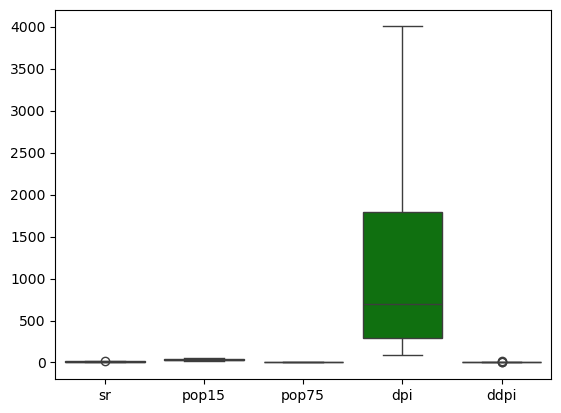

In [7]:
df_copy = df
sns.boxplot(df_copy, color= 'green')

<h5>While the disposable personal income (dpi) displays significant fluctuation but no outliers, <br>
the box plot especially exposes outliers in the service rate (sr) and change in disposable income (ddpi). <br>
There are no outliers in the population variables (pop15, pop75), suggesting that odd situations <br>
mostly occur in rate-of-change measures rather than absolute values.</h5>

In [8]:
Q1= df_copy[['sr','ddpi']].quantile(0.25)
Q3= df_copy[['sr','ddpi']].quantile(0.75)
IQR = Q3 - Q1

UPPERBOUND = Q3 + 1.5 * IQR
LOWERBOUND = Q3 - 1.5 * IQR

In [9]:
updated_df = df_copy
updated_df[['sr','ddpi']] = np.where(
    updated_df[['sr','ddpi']] < LOWERBOUND, LOWERBOUND,
    np.where(
        updated_df[['sr','ddpi']] > UPPERBOUND, UPPERBOUND, updated_df[['sr','ddpi']]
    )
)

<AxesSubplot: >

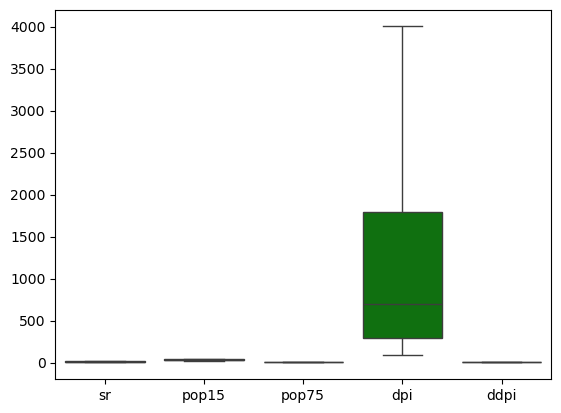

In [31]:
sns.boxplot(updated_df, color = 'green')

# Number 2



In [10]:
print("\n  2. DESCRIPTIVE STATISTICS:")
print(df.describe())


  2. DESCRIPTIVE STATISTICS:
              sr      pop15      pop75          dpi       ddpi
count  50.000000  50.000000  50.000000    50.000000  50.000000
mean    9.905650  35.089600   2.293000  1106.758400   3.563500
std     4.095972   9.151727   1.290771   990.868889   2.145463
min     4.146250  21.440000   0.560000    88.940000   0.765000
25%     6.970000  26.215000   1.125000   288.207500   2.002500
50%    10.510000  32.575000   2.175000   695.665000   3.000000
75%    12.617500  44.065000   3.325000  1795.622500   4.477500
max    21.088750  47.640000   4.700000  4001.890000   8.190000


 <h5>1. Central Variability and Tendency: - A moderate disposable income (dpi) of 1106.76 is one example of an average condition that is indicated by the mean and median.</h5>
   <h5>- Standard Deviation: A high degree of variability (such as a dpi of 990.87) indicates a high level of income disparity in the population.</h5>

<h5>2. Distribution Characteristics: - Range: Economic disparities are shown by the significant variation between the minimum (88.94) and maximum (4001.89) dpi.</h5>
   <h5>- Quartiles: A sizable youth population is indicated by the 75th percentile for </h5>
   <h5>- pop15 (44.07), which informs healthcare and education requirements.</h5>

<h5>3. Policy Implications: - Based on demographic distributions, data insights can direct focused initiatives, such more funding for youth services or senior care.</h5>

<h5>4. Foundation for Further Analysis: - Descriptive statistics enable inferential analysis to examine causal linkages by highlighting patterns that demand further </h5><h5>examination.</h5>
<h5>5. Disclosure of results: - Condenses complicated data into easily comprehensible formats, assisting stakeholders in understanding key results and promoting </h5><h5>well-informed decision-making.</h5>


# Number 3


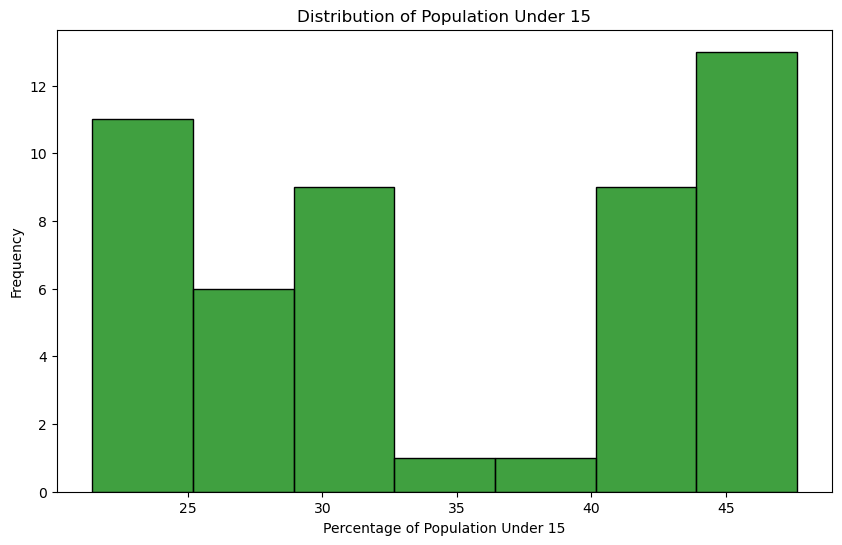

In [32]:
plt.figure(figsize=(10, 6))
sns.histplot(data=updated_df, x='pop15', color='green')
plt.title('Distribution of Population Under 15')
plt.xlabel('Percentage of Population Under 15')
plt.ylabel('Frequency')
plt.show()

<h5>The population under the age of 15 has a bimodal distribution, as seen by this histogram,
with two separate peaks at 25% (~11 frequency) and 45% (~13 frequency). This implies two  <br>
distinct population groupings with notably varying shares of young people, perhaps  <br>
reflecting developed and emerging regions.</h5>

<h5></5>

In [11]:
updated_df[['pop75', 'ddpi']].corr()

,pop75,ddpi
pop75,1.000000,0.050769
ddpi,0.050769,1.000000


<h5> Correlation btn pop75 and ddpi is 0.0505769 thus indicating a very weak correlation, this indicates that the relationship there is little or no betweenn the two</h5>

# Number 4


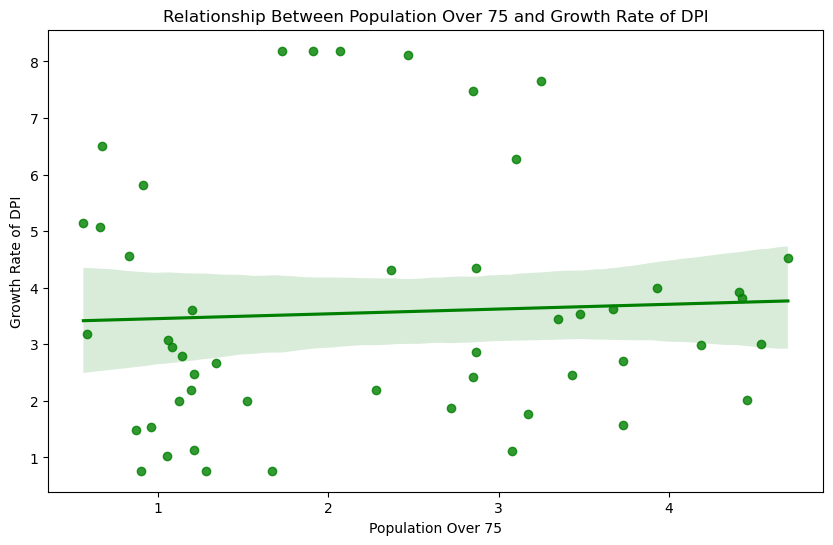

In [33]:
plt.figure(figsize=(10, 6))
sns.regplot(x='pop75', y='ddpi', data=updated_df, color='green')
plt.title('Relationship Between Population Over 75 and Growth Rate of DPI')
plt.xlabel('Population Over 75')
plt.ylabel('Growth Rate of DPI')
plt.show()

In [14]:
updated_df[['dpi','pop75']].corr()



,dpi,pop75
dpi,1.000,0.787
pop75,0.787,1.000


<h5>The scatter plot shows that the DPI Growth Rate and the Population Over 75 have a moderately positive <br.>
connection (0.787). Even while the DPI growth rate fluctuates a lot (1–8%), and is more volatile <br>
in places with fewer senior citizens, the percentage of seniors (1-4.5%) has little effect on DPI growth rates.</h5>

# Number 5

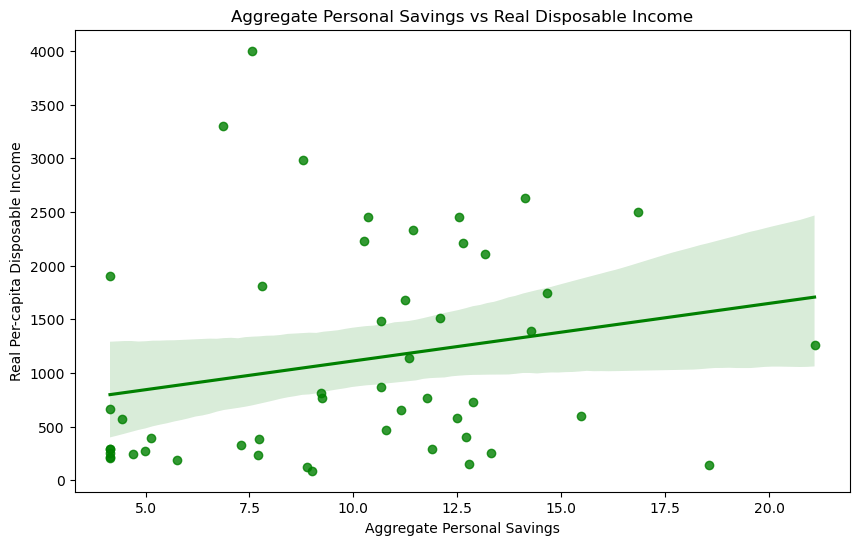

In [38]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='sr', y='dpi',color = 'green')
plt.title('Aggregate Personal Savings vs Real Disposable Income')
plt.xlabel('Aggregate Personal Savings')
plt.ylabel('Real Per-capita Disposable Income')
plt.show()

In [44]:
updated_df[['sr','dpi']].corr()

,sr,dpi
sr,1.000000,0.221648
dpi,0.221648,1.000000


<h5>Real Per-Capita Disposable Income and Aggregate Personal Savings have <br>
a weak positive correlation, with a correlation of 0.221648, indicating <br>
a minor tendency for both to rise together but not a substantial one. </h5>
